### Дата создания: 21.10.2024

## Самая первая попытка сделать классификацию двух газов


#### 1)Попробуем по максимуму преобразовать наши данные

Будем использовать несколько признаков - сопротивление, время, относительная влажность(сейчас будет константой), температура(константа в данный момент), sin_time, cos_time - будем думать как определить


In [27]:
#импорт библиотек
import pandas as pd
import numpy as np

In [28]:
#считывание данных

nh3_2rh_25t = pd.read_excel('Данные для МО/NH3_100_200_300_500 ppm.xlsx', sheet_name='Untitled')
no2_2rh_25t = pd.read_excel('Данные для МО/NO2_2_5_10 ppm_ RH_2%.xlsx', sheet_name='Untitled')
no2_25rh_25t = pd.read_excel('Данные для МО/NO2_2_5_10 ppm_RH_25%.xlsx', sheet_name='Untitled')
no2_50rh_25t = pd.read_excel('Данные для МО/NO2_2_5_10 ppm_RH_50%.xlsx', sheet_name='Untitled')
no2_75rh_25t = pd.read_excel('Данные для МО/NO2_2_5_10 ppm_RH_75%.xlsx', sheet_name='Untitled')



функция для обработки - добавим отдельный столбик с температурой(25), с относительнеой влажностью(для каждого файла она своя, но постоянная)
также надо добавить добавление sin_time и cos_time

In [29]:
#функция для обработки - добавим отдельный столбик с температурой(25), с относительнеой влажностью(для каждого файла она своя, но постоянная)
def temperature_and_RH(df,t,rh):
    df['temperature[°C]'] = t
    df['RH[%]']=rh
    return df

nh3_2rh_25t = temperature_and_RH(nh3_2rh_25t,25,2)
no2_2rh_25t = temperature_and_RH(no2_2rh_25t,25,2)
no2_25rh_25t = temperature_and_RH(no2_25rh_25t,25,25)
no2_50rh_25t = temperature_and_RH(no2_50rh_25t,25,50)
no2_75rh_25t = temperature_and_RH(no2_75rh_25t,25,75)
no2_75rh_25t



,R [Ом],Time [с],temperature[°C],RH[%]
0,0.000000,0.0,25,75
1,1662.937744,0.5,25,75
2,1663.950073,1.0,25,75
3,1666.321777,1.5,25,75
4,1664.376953,2.0,25,75
...,...,...,...,...
12595,1599.931519,6300.0,25,75
12596,1603.424072,6300.5,25,75
12597,1602.138062,6301.0,25,75
12598,1600.826782,6301.5,25,75


In [30]:
#функция для вычисления sin_time и cos_time (период где-то 1000с?) по крайней мере у аммиака
def sin_time_and_cos_time(df, time_column,R_column):
    df['period'] = df[R_column].diff()
    #чтобы не появлялось нанов в столбцах с косинусом и синусом
    df.dropna(subset=['period'], inplace=True)

    df['sin_time'] = np.sin(2 * np.pi * df[time_column] / df['period'])
    df['cos_time'] = np.cos(2 * np.pi * df[time_column] / df['period'])

#удаляем временный столбец 'period'
    df.drop('period', axis=1, inplace=True)
    return df
nh3_2rh_25t = sin_time_and_cos_time(nh3_2rh_25t,'Time [с]','R [Ом]')
no2_2rh_25t  = sin_time_and_cos_time(no2_2rh_25t,'Time [с]','R [Ом]')
no2_25rh_25t = sin_time_and_cos_time(no2_25rh_25t,'Time [с]','R [Ом]')
no2_50rh_25t = sin_time_and_cos_time(no2_50rh_25t,'Time [с]','R [Ом]')
no2_75rh_25t = sin_time_and_cos_time(no2_75rh_25t,'Time [с]','R [Ом]')



c:\Users\katya\anaconda3\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: invalid value encountered in sin
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\Users\katya\anaconda3\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: invalid value encountered in cos
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\Users\katya\anaconda3\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: invalid value encountered in sin
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\Users\katya\anaconda3\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: invalid value encountered in cos
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\Users\katya\anaconda3\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: invalid value encountered in sin
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\Users\katya\anaconda3\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: invalid value encountered in cos
  r

## Все, вроде как, такая небольшая но обработка данных закончилась

In [31]:
nh3_2rh_25t

,R [Ом],Time [с],temperature[°C],RH[%],sin_time,cos_time
1,1916.370361,0.5,25,2,0.001639,0.999999
2,1917.799194,1.0,25,2,-0.950807,-0.309783
3,1914.129395,1.5,25,2,-0.542486,-0.840065
4,1916.431519,2.0,25,2,-0.734267,0.678860
5,1915.614380,2.5,25,2,-0.364946,0.931029
...,...,...,...,...,...,...
13193,1981.473877,6599.5,25,2,-0.872428,-0.488743
13194,1978.415039,6600.0,25,2,0.910567,-0.413361
13195,1980.380371,6600.5,25,2,0.214524,-0.976719
13196,1979.619629,6601.0,25,2,-0.324699,0.945817


## Немного анализа вообще того, почему и как нейросеть будет выглядеть сейчас так, как выглядит


1) Функция активации - ReLu, по не скольким причинам(хотя tanh тоже должна быть неплохой, почему бы не использовать ее?надо подумать)

a) так как сама эта функция достаточно простая, и по факту она выглядит вот так:

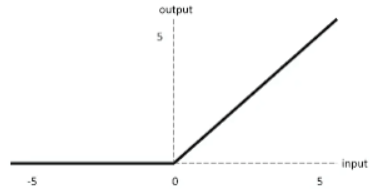

b) помогает системе не "остановиться в обучении"

2) по поводу количества скрытых слоев: думаю, что для задачи сейчас хватит одного слоя, количество нейронов пускай будет 64(думала 32, но захотела 64, посмотрим, что из этого выйдет)
3) на выходном слое, наверное, буду использовать функцию softmax(конечно, сейчас подойдет и функция сигмоиды, но если деление идет более чем на 2 деления то лучше использовать softmax)
4) по поводу метода оптимизации - до этого я думала, что лучше всего градиентный спуск, но там есть разные его вариации, но вот сегодня узнала про функцию adam, посмотрим ее, она должна быть лучше градиентного спуска
5) пускай для начала количество эпох(итераций) будет арвно 500

In [32]:
#импортируем библиотеки, необходимые для нейросетей
import tensorflow as tf
from tensorflow import keras
from keras import layers


def easy_classification(input_shape):
    
    model = keras.Sequential([
    layers.Input(shape=input_shape),
    layers.Dense(16, activation='relu'), # Скрытый слой с 64 нейронами и с функцией активации relu
    layers.Dense(1, activation='sigmoid'), # Выходной слой с одним нейроном и активацией softmax
])

    model.compile(
    optimizer='adam',# для функции оптимизации используем adam
    loss='binary_crossentropy', # для функции потерь кросс-энтропию
    metrics=['accuracy']
)

    return model


In [33]:
# nh3_2rh_25t['res'] = 0
# no2_2rh_25t['res'] = 1

In [34]:
# no2_all_df = pd.concat([no2_2rh_25t,no2_25rh_25t,no2_50rh_25t,no2_75rh_25t], axis=0)
# # nh3_x4_df = pd.concat([nh3_2rh_25t,nh3_2rh_25t,nh3_2rh_25t,nh3_2rh_25t], axis = 0)
# # nh3_x4_df

# no2_all_df

In [35]:
#Функция для объединения наших данных

def prepare_data(df1, df2):

# Объединяем наши данные
    X = pd.concat([df1, df2], axis=0)

#Для каждого датафрейма создадим метки (0 - df1, 1 - df2)(чтобы потом понять удобно что мы в итоге получаем, чему принадлежит)
    y = np.array([0] * len(df1) + [1] * len(df2))

    return X, y

In [1]:
#Итакс, пробуем
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
# Для начала попробуем обЪеденить два наших датафрейма с nh3 и самым простым no2
X, y = prepare_data(nh3_2rh_25t, no2_2rh_25t)
# print(X, y)

#Для нормализации данных
scaler = StandardScaler()
X = scaler.fit_transform(X)
# Определим размер
input_shape = tuple([6])
print(input_shape)

#Разделим на обучающую и тд
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Создаем модель
model = easy_classification(input_shape)

#Обучаем модель
model.fit(X_train, y_train, epochs=5)

loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f'Точность на тестовых данных: {accuracy:.2f}')

NameError: name 'prepare_data' is not defined

In [16]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f'Точность на тестовых данных: {accuracy:.2f}')

Точность на тестовых данных: 0.79


In [18]:
#Посмотрим что предскажет
x_test = nh3_2rh_25t 
predictions = model.predict(x_test)

for i, prediction in enumerate(predictions):
    print(f"Предсказание для элемента {i}: {prediction [0] :.4f}")
    if prediction[0] >= 0.5:
        print(f"Класс: 1 (вероятность: {prediction [0] :.4f})")
    else:
        print(f"Класс: 0 (вероятность: {prediction [0] :.4f})")

413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Предсказание для элемента 0: 0.7943
Класс: 1 (вероятность: 0.7943)
Предсказание для элемента 1: 0.7943
Класс: 1 (вероятность: 0.7943)
Предсказание для элемента 2: 0.7943
Класс: 1 (вероятность: 0.7943)
Предсказание для элемента 3: 0.7943
Класс: 1 (вероятность: 0.7943)
Предсказание для элемента 4: 0.7943
Класс: 1 (вероятность: 0.7943)
Предсказание для элемента 5: 0.7943
Класс: 1 (вероятность: 0.7943)
Предсказание для элемента 6: 0.7943
Класс: 1 (вероятность: 0.7943)
Предсказание для элемента 7: 0.7943
Класс: 1 (вероятность: 0.7943)
Предсказание для элемента 8: 0.7943
Класс: 1 (вероятность: 0.7943)
Предсказание для элемента 9: 0.7943
Класс: 1 (вероятность: 0.7943)
Предсказание для элемента 10: 0.7943
Класс: 1 (вероятность: 0.7943)
Предсказание для элемента 11: 0.7943
Класс: 1 (вероятность: 0.7943)
Предсказание для элемента 12: 0.7943
Класс: 1 (вероятность: 0.7943)
Предсказание для элемента 13: 0.7943
Класс: 1 (вероятность: 0.7943)
Предсказание для 

In [ ]:
import numpy as np

class MyRNN:
    # ... (остальная часть класса остаётся без изменений) ...

    def train(self, X_train, y_train, epochs=10, print_interval=1):
        total_correct_predictions = 0
        total_predictions = 0
        total_tp = 0
        total_fp = 0
        total_fn = 0
        total_tn = 0

        for epoch in range(epochs):
            epoch_loss = 0
            correct_predictions = 0
            tp = 0
            fp = 0
            fn = 0
            tn = 0

            for i, (x, y) in enumerate(zip(X_train, y_train)):
                x = np.array(x).reshape(-1, 1)
                y = np.array([y])

                y_pred, _ = self.forward(x)
                loss = np.mean((y_pred - y) ** 2)  # MSE - среднеквадратичная ошибка
                dy = 2 * (y_pred - y)

                self.backprop(dy)
                epoch_loss += loss
                predicted_class = self.predict(x)

                if y[0] == 1 and predicted_class == 1:
                    tp += 1
                    total_tp += 1
                elif y[0] == 1 and predicted_class == 0:
                    fn += 1
                    total_fn += 1
                elif y[0] == 0 and predicted_class == 1:
                    fp += 1
                    total_fp += 1
                elif y[0] == 0 and predicted_class == 0:
                    tn += 1
                    total_tn += 1

                correct_predictions += int(predicted_class == y[0])
                total_correct_predictions += int(predicted_class == y[0])
                total_predictions += 1

            accuracy = correct_predictions / total_predictions if total_predictions > 0 else 0
            precision = tp / (tp + fp) if (tp + fp) > 0 else 0
            recall = tp / (tp + fn) if (tp + fn) > 0 else 0

            if (epoch + 1) % print_interval == 0 or epoch == epochs - 1:
                print(f"Эпоха {epoch + 1}/{epochs}, потеря: {epoch_loss:.4f}, точность: {accuracy:.4f}, точность (precision): {precision:.4f}, полнота (recall): {recall:.4f}")


        # Вычисление общих метрик ПОСЛЕ цикла
        overall_accuracy = total_correct_predictions / total_predictions if total_predictions > 0 else 0
        overall_precision = total_tp / (total_tp + total_fp) if (total_tp + total_fp) > 0 else 0
        overall_recall = total_tp / (total_tp + total_fn) if (total_tp + total_fn) > 0 else 0
        print(f"\nОбщая точность: {overall_accuracy:.4f}, Общая точность (precision): {overall_precision:.4f}, Общая полнота (recall): {overall_recall:.4f}")

# Пример использования (остаётся без изменений)
input_size = 1
hidden_size = 13
output_size = 1 # Изменено на 1 для бинарной классификации

simple_rnn = MyRNN(input_size, hidden_size, output_size) # output_size изменён

X_train_nh3 = [[1], [2], [3], [4], [5]]
X_train_no2_2rh = [[6], [7], [8],[9],[10]]
X_train = X_train_nh3 + X_train_no2_2rh

y_train = [1,1,1,1,1,0,0,0,0,0]


simple_rnn.train(X_train, y_train, epochs=100) # увеличено число эпох для лучшего обучения.